# 3. 데이터 정제를 통한 모델 성능 개선

- [캐글 당뇨병 데이터](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)로 실습 진행

- 데이터 구성
  - Pregnancies: 임신 횟수
  - Glucose: 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
  - BloodPressure: 이완기 혈압
  - SkinThickness: 삼두근 피부 주름 두께
  - Insulin: 2시간 혈청 인슐린
  - BMI: 체질량 지수
  - DiabetesPedigreeFunction: 당뇨병 혈통 기능
  - Age: 나이
  - Outcome: 768개
    - 268개(1): 당뇨병 환자 데이터
    - 500개(0): 당뇨병 환자가 아닌 데이터

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 불러오기

In [ ]:
# 구글 드라이브 연결
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/coaching_study/study/data/diabetes.csv')

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 데이터 정제

```

데이터 정제 전                     accuracy score: 71.43%

Pregnancies 범주형으로 변환 후      accuracy score: 74.68%

- Age 범주형으로 변환 후            accuracy score: 66.23%

+ Insulin 결측치 처리
          1. 평균으로 채우기        accuracy score: 85.06%
          2. 중앙값으로 채우기      accuracy score: 85.06%
          -> 둘의 차이는 없어 보임.

+ Insulin_nan 분포 로그 변환 후     accuracy score: 89.61%

- Insulin&Glucose 파생변수 생성    accuracy score: 88.31%

+ Insulin 일부 이상치 제거 후       accuracy score: 92.0%


```

### (1) 수치형 데이터를 범주형으로 변환

<br>

앞서 진행해 본 시각화를 통해 임신 횟수에서 6회를 기준으로 발병률이 나뉘는 것을 알 수 있었음 \
-> 'Pregnancies'를 6회 이하는 False, 7회 이상은 True인 범주형으로 변환 진행

In [ ]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

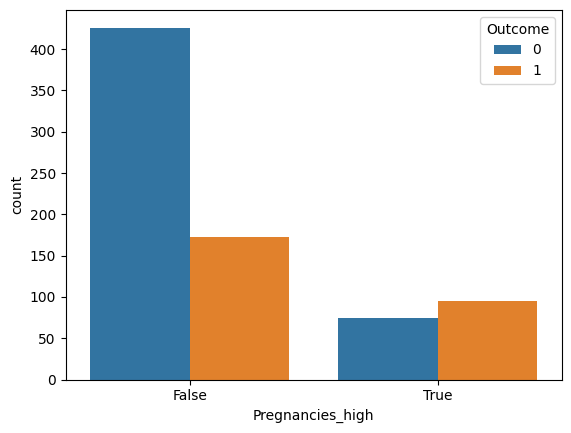

In [ ]:
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

### (2) 범주형 데이터를 수치형으로 변환


나이 변수를 30세 이하, 30-60세, 60세 이상의 범주로 변환

In [ ]:
# df['Age_30'] = df['Age'] <= 30
# df['Age_30_60'] = (df['Age'] > 30) & (df['Age'] <= 60)
# df['Age_60'] = df['Age'] > 60

# df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_30,Age_30_60,Age_60
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False


<Axes: xlabel='Age_60', ylabel='count'>

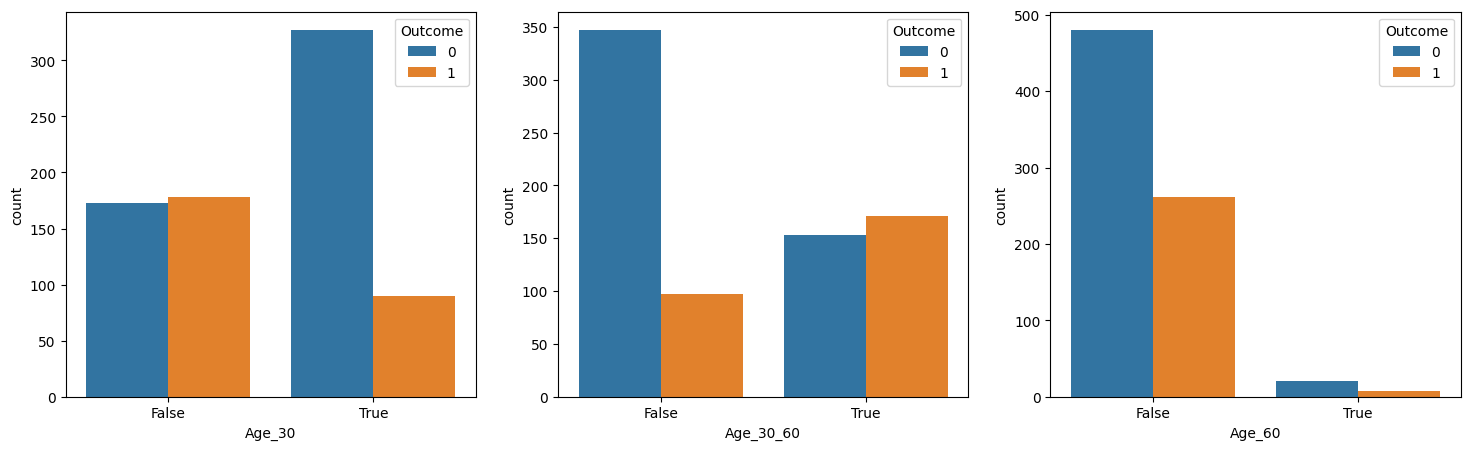

In [ ]:
# fig = plt.figure(figsize=(18,5))

# ax1 = fig.add_subplot(1,3,1)
# ax2 = fig.add_subplot(1,3,2)
# ax3 = fig.add_subplot(1,3,3)

# sns.countplot(df, x='Age_30', hue='Outcome', ax=ax1)
# sns.countplot(df, x='Age_30_60', hue='Outcome', ax=ax2)
# sns.countplot(df, x='Age_60', hue='Outcome', ax=ax3)

### (3) 결측치 처리


인슐린과 글루코스, 피부두께, BMI와 같이 0이 되어선 안되는 값들이 min값으로 0이 들어가 있는 것으로 보아 결측치가 존재함을 알 수 있음. \

먼저 인슐린을 처리해보자.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Insulin에서 0인 값 nan으로 변경

df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)
df[['Insulin', 'Insulin_nan']].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [ ]:
df.groupby(['Outcome'])[['Insulin', 'Insulin_nan']].agg(['mean', 'median'])

# 결측치 제외 전 후의 평균과 중앙값 차이가 큼을 알 수 있음

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

#### 평균값으로 채워보기

In [ ]:
# df.loc[(df['Outcome']==0) & (df['Insulin_nan'].isnull()==True), 'Insulin_nan'] = 130
# df.loc[(df['Outcome']==1) & (df['Insulin_nan'].isnull()==True), 'Insulin_nan'] = 206

In [ ]:
# df[['Insulin_nan', 'Outcome']].head()

,Insulin_nan,Outcome
0,206.0,1
1,130.0,0
2,206.0,1
3,94.0,0
4,168.0,1


<Axes: xlabel='Insulin_nan', ylabel='Count'>

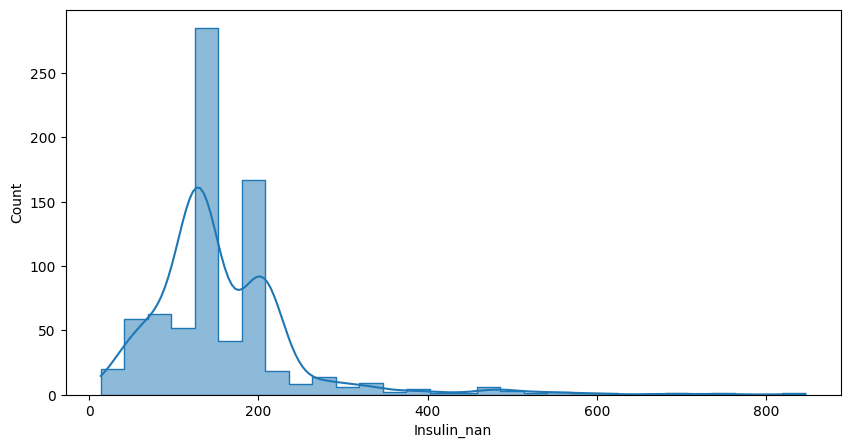

In [ ]:
# plt.figure(figsize=(10, 5))
# sns.histplot(data=df, x='Insulin_nan', bins=30, kde=True, element="step")

#### 중앙값으로 채워보기

In [ ]:
df.loc[(df['Outcome']==0) & (df['Insulin_nan'].isnull()==True), 'Insulin_nan'] = 102.5
df.loc[(df['Outcome']==1) & (df['Insulin_nan'].isnull()==True), 'Insulin_nan'] = 169.5

In [ ]:
df[['Insulin_nan', 'Outcome']].head()

,Insulin_nan,Outcome
0,169.5,1
1,102.5,0
2,169.5,1
3,94.0,0
4,168.0,1


<Axes: xlabel='Insulin_nan', ylabel='Count'>

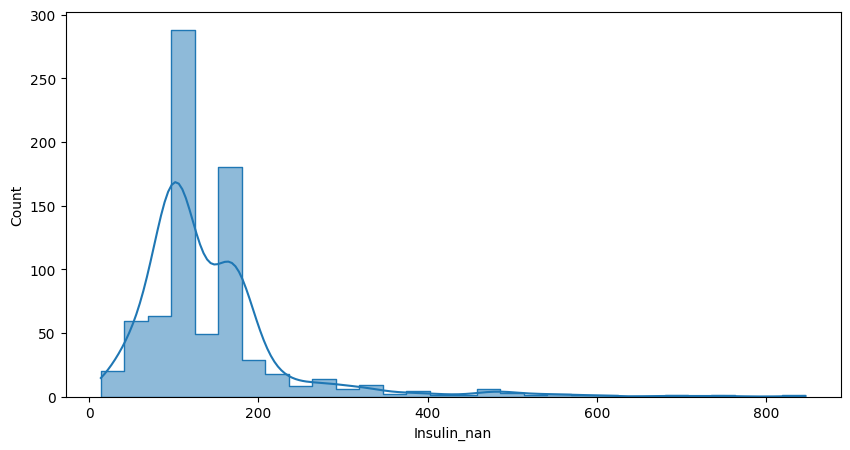

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Insulin_nan', bins=30, kde=True, element="step")

### (4) 수치형 변수 정규화

-> 데이터가 너무 흩어져 있으면 학습에 어려움이 생길 수 있음

#### log 변환

<Axes: xlabel='Insulin_nan', ylabel='Density'>

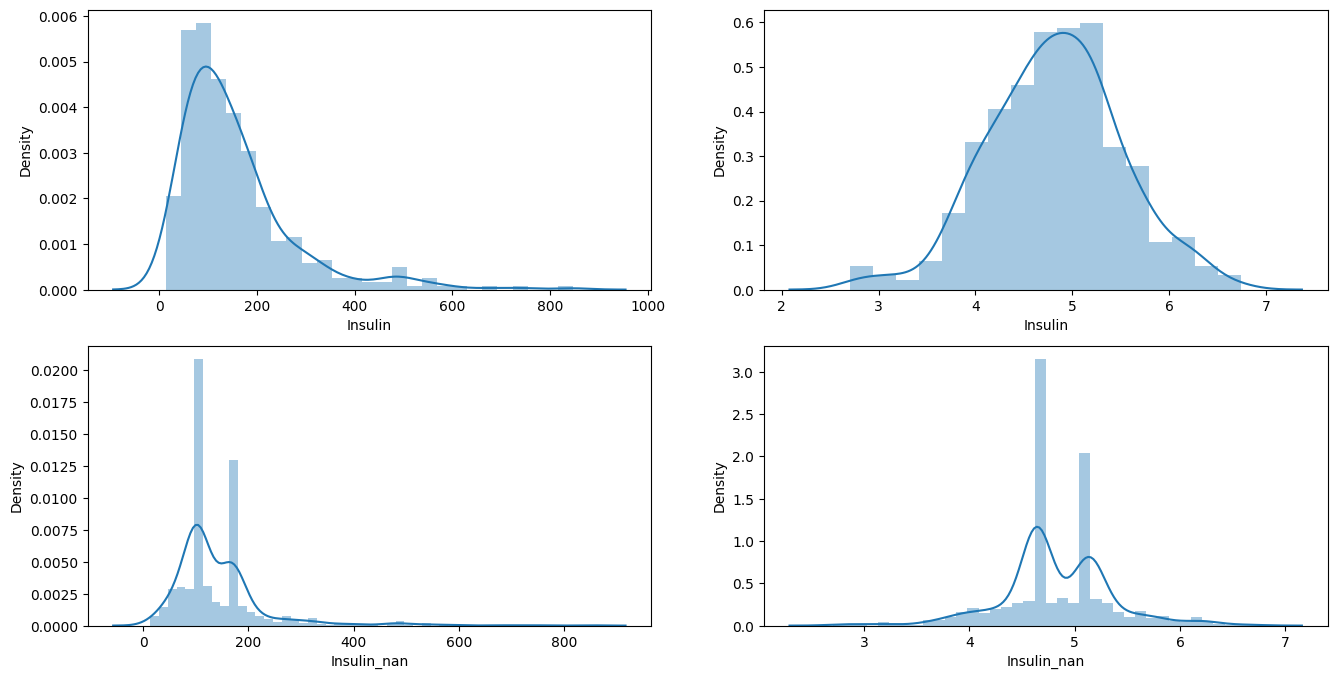

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'], ax=axes[0, 0])
sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1), ax=axes[0, 1])
sns.distplot(df['Insulin_nan'], ax=axes[1, 0])
sns.distplot(np.log(df['Insulin_nan'] + 1), ax=axes[1, 1])

# log변환을 통해 데이터를 정규분포 형태로 변환시킬 수 있음
# +1을 해주는 이유는 log함수가 1이하의 값에 대해선 음수를 출력하기 때문임

In [ ]:
df['Insulin_log'] = np.log(df['Insulin_nan'] + 1)

### (5) 상관관계 분석을 통한 파생변수 생성

<Axes: xlabel='Insulin_nan', ylabel='Glucose'>

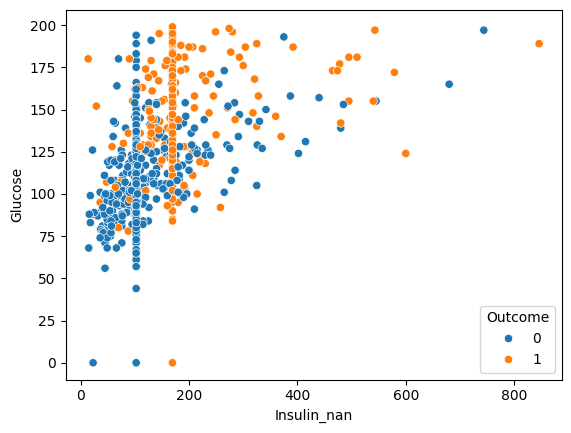

In [ ]:
# sns.scatterplot(df, x='Insulin_nan', y='Glucose', hue='Outcome')

In [ ]:
# df['low_glu_in'] = (df['Glucose']<125) & (df['Insulin_nan']<150)

### (6) 이상치 제거

<Axes: xlabel='Insulin_nan'>

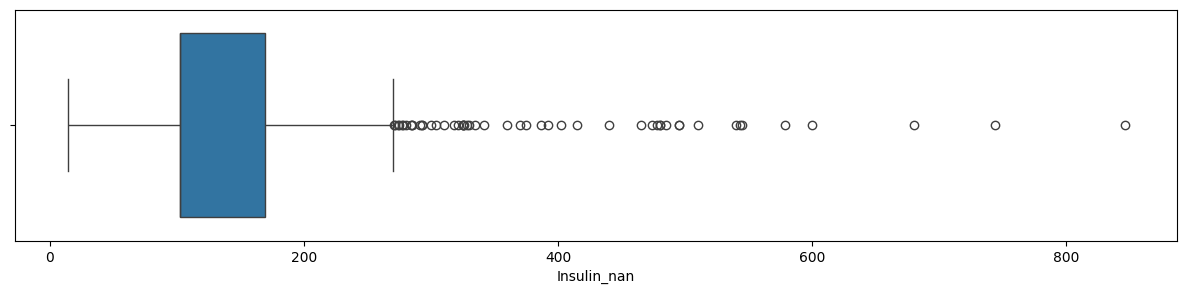

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(df[['Insulin_nan']], x='Insulin_nan')

In [ ]:
IQR3 = df['Insulin_nan'].quantile(0.75) # 제 3사분위수
IQR1 = df['Insulin_nan'].quantile(0.25) # 제 1사분위수
IQR = IQR3 -  IQR1
outlier = IQR3 + 1.5*IQR

print(f'IQR: {IQR}, outlier: {outlier}')
print('이상치 개수:', len(df[df['Insulin_nan'] > outlier]))

IQR: 67.0, outlier: 270.0
이상치 개수: 51


In [ ]:
# df = df[df['Insulin_nan'] < outlier]
df = df[df['Insulin_nan'] < 400]
len(df)

748

### (7) Scaling

In [ ]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_log
0,6,148,72,35,0,33.6,0.627,50,1,False,169.5,5.138735
1,1,85,66,29,0,26.6,0.351,31,0,False,102.5,4.639572


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_nan,Insulin_log
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,3.859626,119.795455,69.006684,20.164439,67.633690,31.879545,0.467698,33.224599,0.342246,131.244652,4.782400
std,3.377669,31.471279,19.521689,15.925814,87.370571,7.892594,0.320778,11.724199,0.474779,59.938955,0.471335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,14.000000,2.708050
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.175000,0.243750,24.000000,0.000000,102.500000,4.639572
50%,3.000000,116.000000,72.000000,22.000000,7.000000,32.000000,0.369000,29.000000,0.000000,102.500000,4.639572
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.425000,0.624500,41.000000,1.000000,169.500000,5.138735
max,17.000000,199.000000,122.000000,99.000000,392.000000,67.100000,2.420000,81.000000,1.000000,392.000000,5.973810


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']])
scale_fit = scaler.transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']])
scale_fit

array([[0.74371859, 0.59016393, 0.35353535, 0.23441503],
       [0.42713568, 0.54098361, 0.29292929, 0.11656704],
       [0.91959799, 0.52459016, 0.        , 0.25362938],
       ...,
       [0.6080402 , 0.59016393, 0.23232323, 0.07130658],
       [0.63316583, 0.49180328, 0.        , 0.11571307],
       [0.46733668, 0.57377049, 0.31313131, 0.10119556]])

In [ ]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']] = scale_fit
df[['Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']].head(2)

,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction
0,0.743719,0.590164,0.353535,0.234415
1,0.427136,0.540984,0.292929,0.116567


## 데이터 분할

In [ ]:
split_cnt = int(len(df)*0.8)
split_cnt

598

In [ ]:
# 학습용 0.8 / 테스트용 0.2 비율로 분할
train = df[:split_cnt].copy()
test = df[split_cnt:].copy()

print(f'train {train.shape} / test {test.shape}')

train (598, 12) / test (150, 12)


In [ ]:
# feature와 target으로 나누기
feature_names = df.columns.tolist()
feature_names.remove('Outcome')
feature_names.remove('Pregnancies')
feature_names.remove('Insulin')
feature_names.remove('Insulin_nan')

target_name = 'Outcome'

print('feature:', feature_names)
print('target:', target_name)

feature: ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_log']
target: Outcome


In [ ]:
X_train = train[feature_names]
y_train = train[target_name]

print(X_train.shape, y_train.shape)

(598, 8) (598,)


In [ ]:
X_test = test[feature_names]
y_test = test[target_name]

print(X_test.shape, y_test.shape)

(150, 8) (150,)


## 의사결정나무로 학습과 예측하기

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 선언및 학습
decision_model = DecisionTreeClassifier(random_state=42)
decision_model.fit(X_train, y_train)

# 예측
y_pred = decision_model.predict(X_test)
y_pred[:5]

array([1, 0, 0, 0, 1])

## 모델 시각화 및 성능 측정

### 시각화

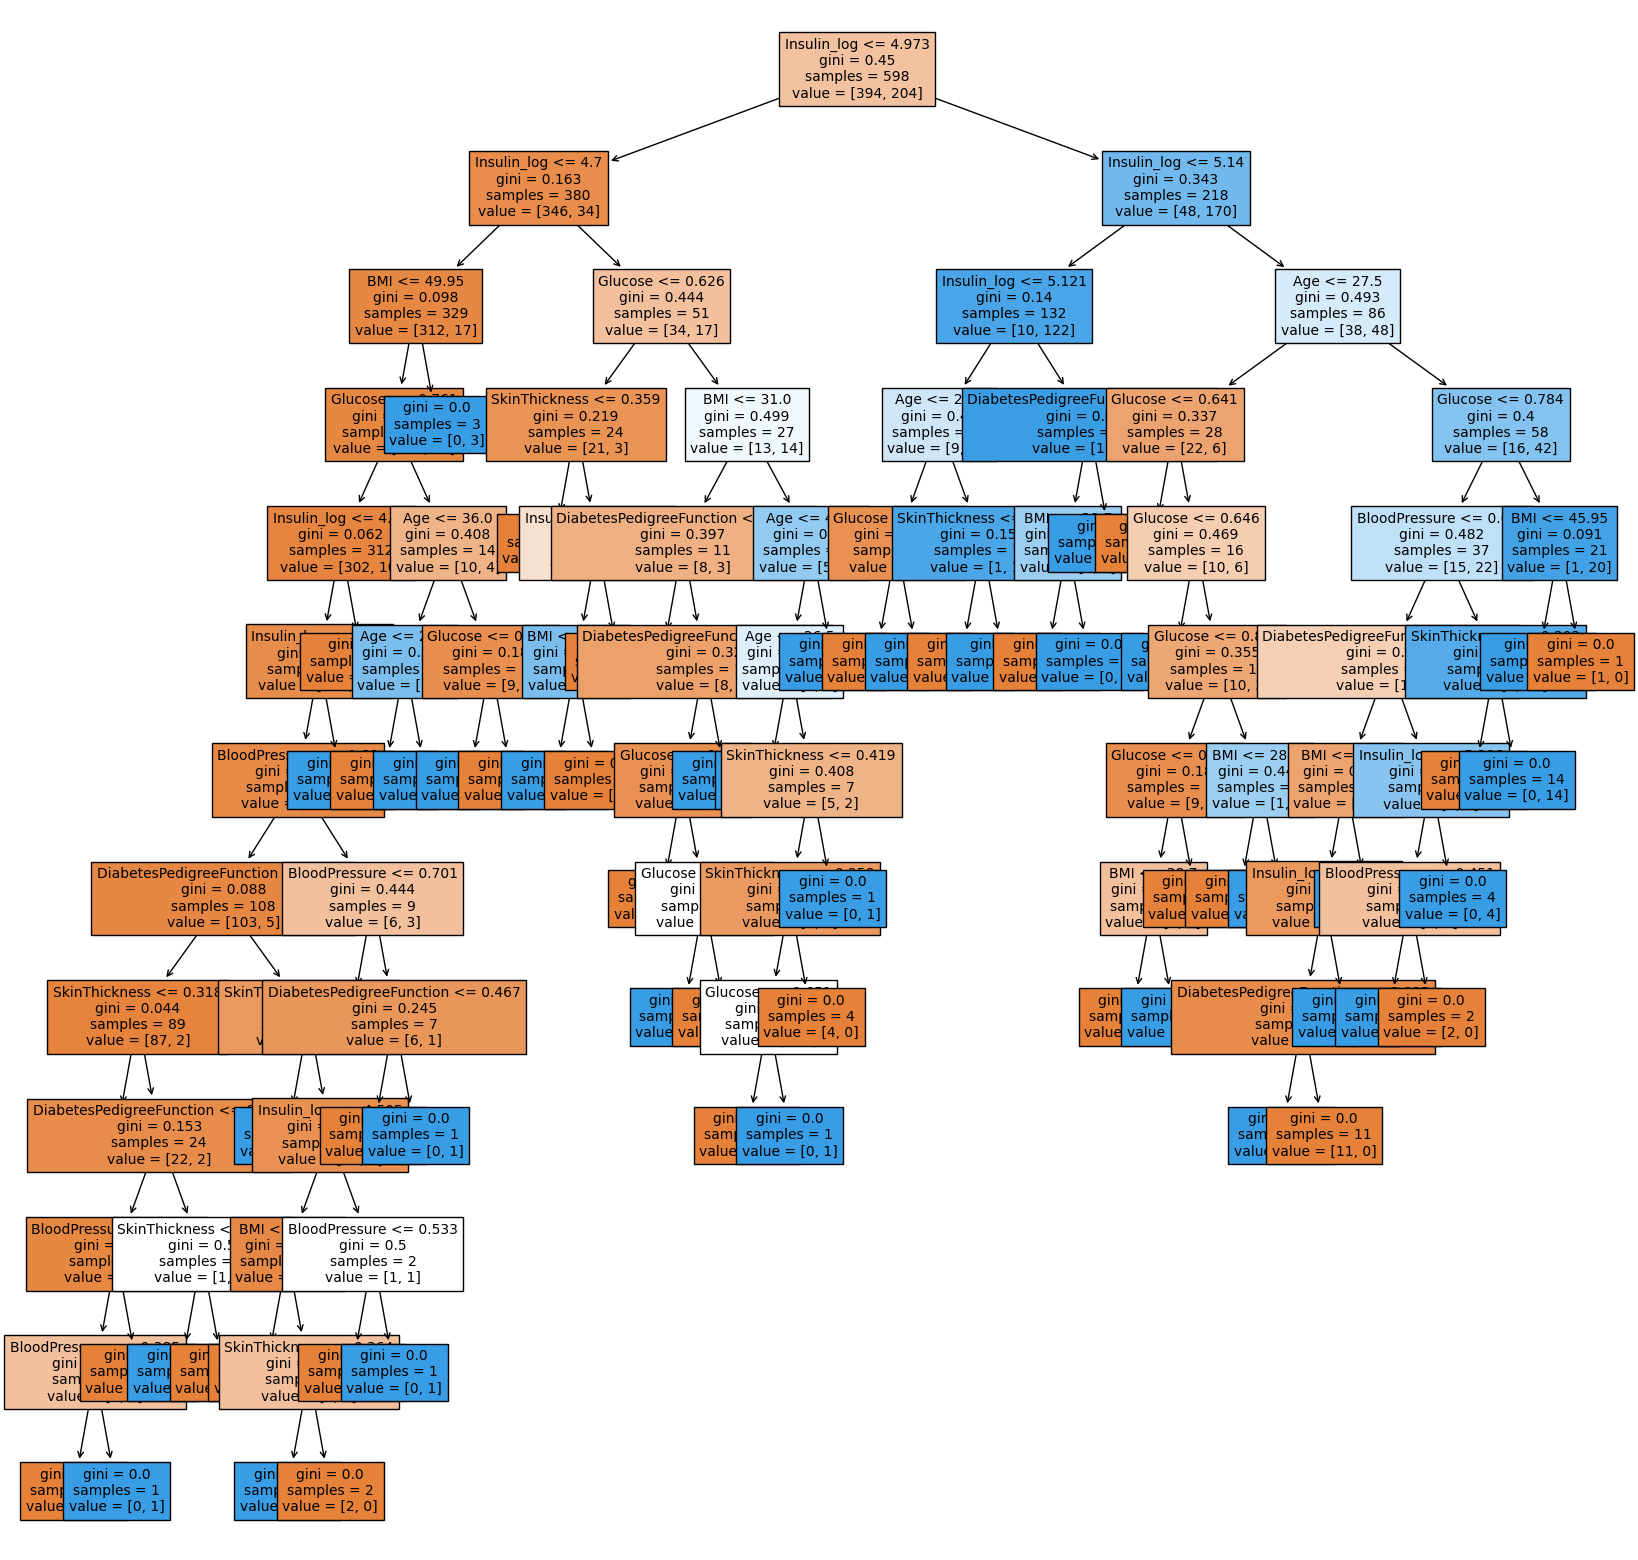

In [ ]:
# from sklearn.tree import plot_tree

# plt.figure(figsize=(20, 20))
# tree = plot_tree(decision_model,feature_names=feature_names,
#                 filled=True, fontsize=10)

In [ ]:
# !apt install libgraphviz-dev
# !pip install pygraphviz

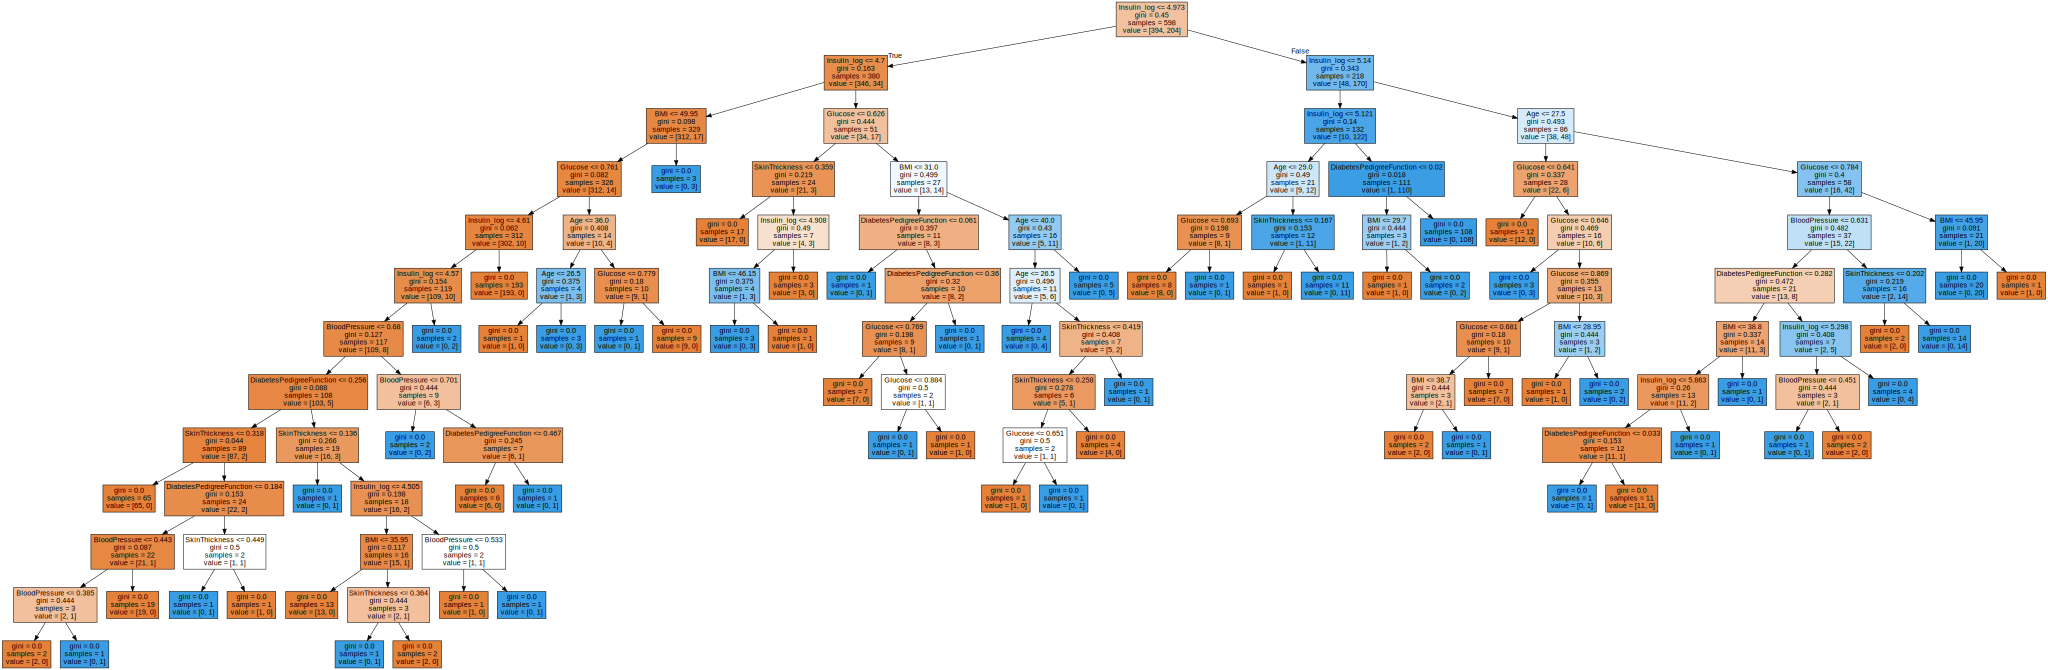

In [ ]:
# import graphviz
# from sklearn.tree import export_graphviz

# tree = export_graphviz(decision_model, feature_names=feature_names,
#                        filled=True)

# graphviz.Source(tree)

### feature importance

In [ ]:
importance = decision_model.feature_importances_
print(importance)

[0.08260945 0.04586839 0.04867923 0.06310843 0.03886423 0.09085903
 0.         0.63001124]


<Axes: >

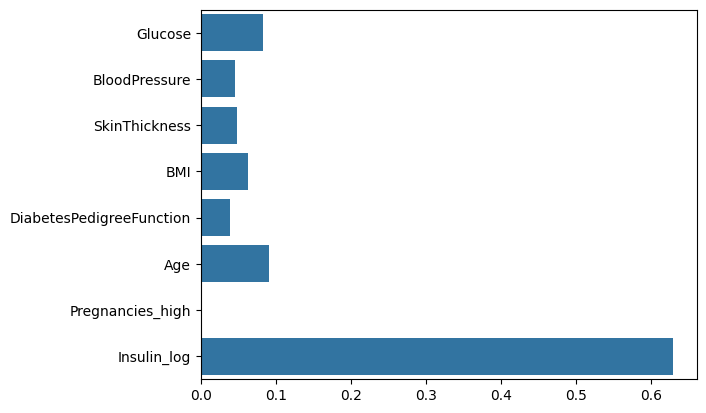

In [ ]:
sns.barplot(x=importance, y=feature_names)

### 정확도 측정

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'accuracy score: {round(acc*100, 2)}%')

accuracy score: 92.0%
